In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('bmh')

In [2]:
# Implementation of Eq. (1) in the exam set
def doublegyre(x, y, t, A, e, w):
    a = e * np.sin(w*t)
    b = 1 - 2*e*np.sin(w*t)
    f = a*x**2 + b*x
    return np.array([
            -np.pi*A*np.sin(np.pi*f) * np.cos(np.pi*y),              # x component of velocity
             np.pi*A*np.cos(np.pi*f) * np.sin(np.pi*y) * (2*a*x + b) # y component of velocity
        ])


# Wrapper function to pass to integrator
# X0 is a two-component vector [x, y]
def f(X, t):
    # Parameters of the velocity field
    A = 0.1
    e = 0.25 # epsilon
    w = 1    # omega
    return doublegyre(X[0], X[1], t, A, e, w)


# Forward Euler integrator
# X0 is a two-component vector [x, y]
def euler(X, t, dt, f):
    k1 = f(X,           t)
    return X + dt*k1


# 4th order Runge-Kutta integrator
# X0 is a two-component vector [x, y]
def rk4(X, t, dt, f):
    k1 = f(X,           t)
    k2 = f(X + k1*dt/2, t + dt/2)
    k3 = f(X + k2*dt/2, t + dt/2)
    k4 = f(X + k3*dt,   t + dt)
    return X + dt*(k1 + 2*k2 + 2*k3 + k4) / 6


# Function to calculate a trajectory from an
# initial position X0 at t = 0, moving forward
# until t = tmax, using the given timestep and
# integrator
def trajectory(X0, tmax, dt, integrator, f):
    t    = 0
    # Number of timesteps
    Nx = int(tmax / dt)
    # Array to hold the entire trajectory
    PX = np.zeros((2, Nx+1))
    # Initial position
    PX[:,0] = X0
    # Loop over all timesteps
    for i in range(1, Nx+1):
        PX[:,i] = integrator(PX[:,i-1], t, dt, f)
        t += dt
    # Return entire trajectory
    return PX

# Plot velocity vector field

(0, 1)

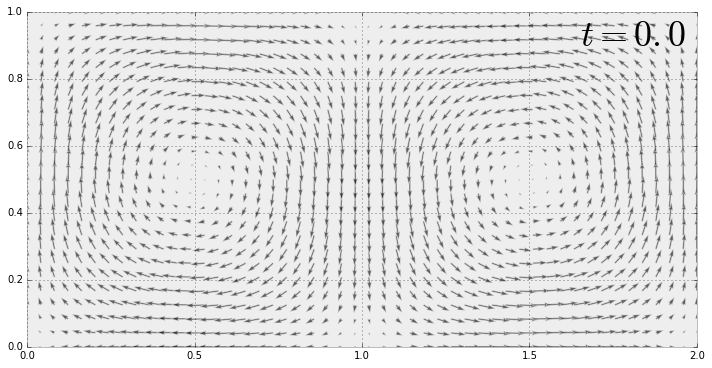

In [3]:
# Create a grid of points
x = np.linspace(0, 2, 50)
y = np.linspace(0, 1, 25)
X, Y = np.meshgrid(x, y)

# Time and parameters of current field
t = 0.0
A = 0.1
e = 0.25
w = 1

# Calculate field
V = doublegyre(X, Y, t, A, e, w)

# Vector plot
fig = plt.figure(figsize = (12,6))
plt.quiver(X, Y, V[0], V[1], linewidths = -1.0, scale = 10, alpha = 0.6)
# Add text showing time, and set plot limits
plt.text(1.65, 0.9, '$t = %s$' % t, size = 36)
plt.xlim(0,2)
plt.ylim(0,1)

# Plot trajectories

(0, 1)

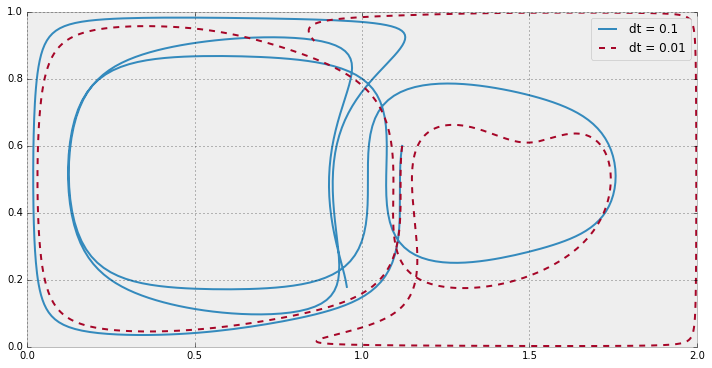

In [4]:
# Using forward Euler

X0   = [1.12, 0.6]
tmax = 50

# Set figure size
fig = plt.figure(figsize = (12,6))

# Plot trajectory for dt = 0.1
dt   = 0.1
T = trajectory(X0, tmax, dt, euler, f)
plt.plot(T[0,:], T[1,:], label = 'dt = %s' % dt)

# Plot trajectory for dt = 0.01
dt   = 0.01
T = trajectory(X0, tmax, dt, euler, f)
plt.plot(T[0,:], T[1,:], '--', label = 'dt = %s' % dt)

# Add legend and set limits
plt.legend()
plt.xlim(0,2)
plt.ylim(0,1)

(0, 1)

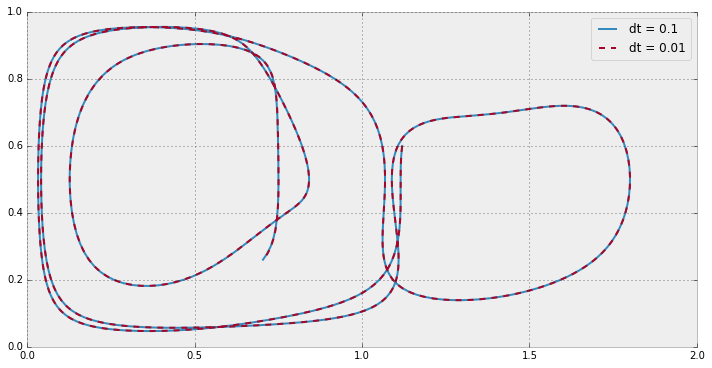

In [5]:
# Using Runge-Kutta

X0   = [1.12, 0.6]
tmax = 50

# Set figure size
fig = plt.figure(figsize = (12,6))

# Plot trajectory for dt = 0.1
dt   = 0.1
T = trajectory(X0, tmax, dt, rk4, f)
plt.plot(T[0,:], T[1,:], label = 'dt = %s' % dt)

# Plot trajectory for dt = 0.01
dt   = 0.01
T = trajectory(X0, tmax, dt, rk4, f)
plt.plot(T[0,:], T[1,:], '--', label = 'dt = %s' % dt)

# Add legend and set limits
plt.legend()
plt.xlim(0,2)
plt.ylim(0,1)

In [10]:
#manual trajectory

X0   = [1.12, 0.6]
tmax = 1



# Plot trajectory for dt = 0.1
dt   = 0.1
#T = trajectory(X0, tmax, dt, rk4, f)

#def trajectory(X0, tmax, dt, integrator, f):
t    = 0
# Number of timesteps
Nx = int(tmax / dt)
# Array to hold the entire trajectory
PX = np.zeros((2, Nx+1))
# Initial position
PX[:,0] = X0

In [11]:
PX

array([[ 1.12,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ],
       [ 0.6 ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ]])

In [12]:
# Loop over all timesteps
for i in range(1, Nx+1):
    PX[:,i] = rk4(PX[:,i-1], t, dt, f)
    t += dt
# Return entire trajectory
#return PX

In [13]:
PX

array([[ 1.12      ,  1.1172441 ,  1.11585701,  1.11540831,  1.11544729,
         1.11552618,  1.11522065,  1.11414663,  1.1119728 ,  1.10842866,
         1.10330838],
       [ 0.6       ,  0.57131926,  0.54111395,  0.50983699,  0.4779762 ,
         0.44603156,  0.41449039,  0.38380308,  0.35436191,  0.3264853 ,
         0.30040878]])

(0, 1)

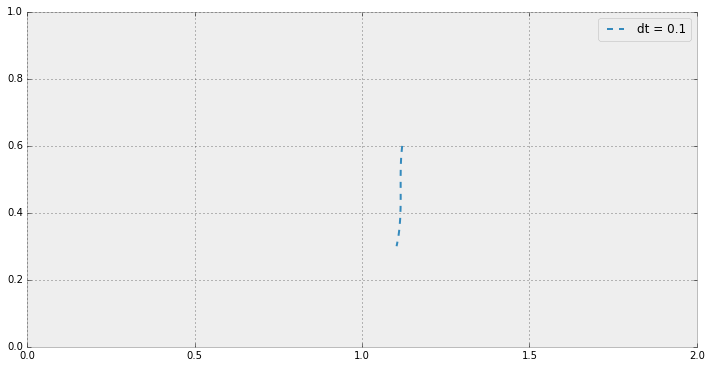

In [14]:
# Set figure size
fig = plt.figure(figsize = (12,6))
plt.plot(PX[0,:], PX[1,:], '--', label = 'dt = %s' % dt)

# Add legend and set limits
plt.legend()
plt.xlim(0,2)
plt.ylim(0,1)

# Grid of points

In [48]:
# Specify resolution
Nx = 10
Ny = 5
n = Nx*Ny

# Specify limit of particles
particles_x_min = 0.9
particles_x_max = 1.1
particles_y_min = 0.4
particles_y_max = 0.6

# Create lists of all x and y positions
X  = np.linspace(particles_x_min, particles_x_max, Nx)
Y  = np.linspace(particles_y_min, particles_y_max, Ny)

(0, 1)

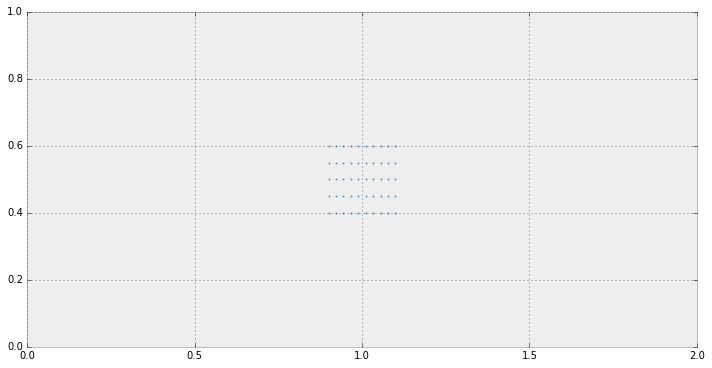

In [49]:
# Array to hold all grid points
X0 = np.zeros((2, Ny, Nx))
# Use meshgrid to turn lists into rank 2 arrays
# of x and y positions
X0[:] = np.meshgrid(X, Y)

# Make scatter plot to show all grid points
fig = plt.figure(figsize = (12,6))
plt.scatter(X0[0,:], X0[1,:], marker = '.', c = '#348ABD')
plt.xlim(0,2)
plt.ylim(0,1)

(0, 1)

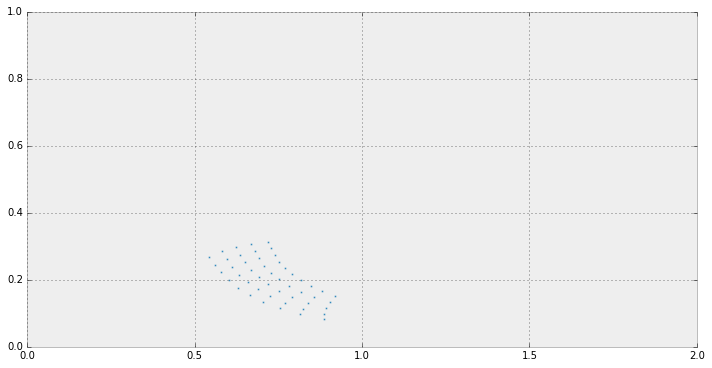

In [50]:
# Array to hold all grid points after transport
X1 = np.zeros((2, Ny, Nx))

# Transport parameters
tmax = 2.0
dt   = 0.5

# Loop over grid and update all positions
# This is where parallelisation would happen, since
# each position is independent of all the others
for i in range(Nx):
    for j in range(Ny):
        # Keep only the last position, not the entire trajectory
        X1[:,j,i] = trajectory(X0[:,j,i], tmax, dt, rk4, f)[:,-1]

        
# Make scatter plot to show all grid points
fig = plt.figure(figsize = (12,6))
plt.scatter(X1[0,:], X1[1,:], marker = '.', c = '#348ABD')
plt.xlim(0,2)
plt.ylim(0,1)

In [51]:
### test of coordinate arrays instead:
#particle_x:
x = np.hstack(X0[0][:])
x

array([ 0.9       ,  0.92222222,  0.94444444,  0.96666667,  0.98888889,
        1.01111111,  1.03333333,  1.05555556,  1.07777778,  1.1       ,
        0.9       ,  0.92222222,  0.94444444,  0.96666667,  0.98888889,
        1.01111111,  1.03333333,  1.05555556,  1.07777778,  1.1       ,
        0.9       ,  0.92222222,  0.94444444,  0.96666667,  0.98888889,
        1.01111111,  1.03333333,  1.05555556,  1.07777778,  1.1       ,
        0.9       ,  0.92222222,  0.94444444,  0.96666667,  0.98888889,
        1.01111111,  1.03333333,  1.05555556,  1.07777778,  1.1       ,
        0.9       ,  0.92222222,  0.94444444,  0.96666667,  0.98888889,
        1.01111111,  1.03333333,  1.05555556,  1.07777778,  1.1       ])

In [52]:
# particle_y
y = np.hstack(X0[1][:])
y

array([ 0.4 ,  0.4 ,  0.4 ,  0.4 ,  0.4 ,  0.4 ,  0.4 ,  0.4 ,  0.4 ,
        0.4 ,  0.45,  0.45,  0.45,  0.45,  0.45,  0.45,  0.45,  0.45,
        0.45,  0.45,  0.5 ,  0.5 ,  0.5 ,  0.5 ,  0.5 ,  0.5 ,  0.5 ,
        0.5 ,  0.5 ,  0.5 ,  0.55,  0.55,  0.55,  0.55,  0.55,  0.55,
        0.55,  0.55,  0.55,  0.55,  0.6 ,  0.6 ,  0.6 ,  0.6 ,  0.6 ,
        0.6 ,  0.6 ,  0.6 ,  0.6 ,  0.6 ])

In [64]:
xy1 = np.zeros((2, n))
xy1

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [66]:
print(X0)

[[[ 0.9         0.92222222  0.94444444  0.96666667  0.98888889  1.01111111
    1.03333333  1.05555556  1.07777778  1.1       ]
  [ 0.9         0.92222222  0.94444444  0.96666667  0.98888889  1.01111111
    1.03333333  1.05555556  1.07777778  1.1       ]
  [ 0.9         0.92222222  0.94444444  0.96666667  0.98888889  1.01111111
    1.03333333  1.05555556  1.07777778  1.1       ]
  [ 0.9         0.92222222  0.94444444  0.96666667  0.98888889  1.01111111
    1.03333333  1.05555556  1.07777778  1.1       ]
  [ 0.9         0.92222222  0.94444444  0.96666667  0.98888889  1.01111111
    1.03333333  1.05555556  1.07777778  1.1       ]]

 [[ 0.4         0.4         0.4         0.4         0.4         0.4         0.4
    0.4         0.4         0.4       ]
  [ 0.45        0.45        0.45        0.45        0.45        0.45        0.45
    0.45        0.45        0.45      ]
  [ 0.5         0.5         0.5         0.5         0.5         0.5         0.5
    0.5         0.5         0.5       ]
  

In [68]:
m = [x,y]
print(m)

[array([ 0.9       ,  0.92222222,  0.94444444,  0.96666667,  0.98888889,
        1.01111111,  1.03333333,  1.05555556,  1.07777778,  1.1       ,
        0.9       ,  0.92222222,  0.94444444,  0.96666667,  0.98888889,
        1.01111111,  1.03333333,  1.05555556,  1.07777778,  1.1       ,
        0.9       ,  0.92222222,  0.94444444,  0.96666667,  0.98888889,
        1.01111111,  1.03333333,  1.05555556,  1.07777778,  1.1       ,
        0.9       ,  0.92222222,  0.94444444,  0.96666667,  0.98888889,
        1.01111111,  1.03333333,  1.05555556,  1.07777778,  1.1       ,
        0.9       ,  0.92222222,  0.94444444,  0.96666667,  0.98888889,
        1.01111111,  1.03333333,  1.05555556,  1.07777778,  1.1       ]), array([ 0.4 ,  0.4 ,  0.4 ,  0.4 ,  0.4 ,  0.4 ,  0.4 ,  0.4 ,  0.4 ,
        0.4 ,  0.45,  0.45,  0.45,  0.45,  0.45,  0.45,  0.45,  0.45,
        0.45,  0.45,  0.5 ,  0.5 ,  0.5 ,  0.5 ,  0.5 ,  0.5 ,  0.5 ,
        0.5 ,  0.5 ,  0.5 ,  0.55,  0.55,  0.55,  0.55,  0.55,  0.5

In [30]:
# Array to hold all grid points after transport
x1 = np.zeros(n)
y1 = np.zeros(n)

xy1 = np.zeros((2, n))

# Transport parameters
tmax = 2.0
dt   = 0.5

# Loop over grid and update all positions
# This is where parallelisation would happen, since
# each position is independent of all the others
for i in range(n):
    # Keep only the last position, not the entire trajectory
    xy1[:,j,i] = trajectory(X0[:,j,i], tmax, dt, rk4, f)[:,-1]

        
# Make scatter plot to show all grid points
fig = plt.figure(figsize = (12,6))
plt.scatter(X1[0,:], X1[1,:], marker = '.', c = '#348ABD')
plt.xlim(0,2)
plt.ylim(0,1)

array([[ 0.4       ,  0.4       ,  0.4       , ...,  0.4       ,
         0.4       ,  0.4       ],
       [ 0.40408163,  0.40408163,  0.40408163, ...,  0.40408163,
         0.40408163,  0.40408163],
       [ 0.40816327,  0.40816327,  0.40816327, ...,  0.40816327,
         0.40816327,  0.40816327],
       ..., 
       [ 0.59183673,  0.59183673,  0.59183673, ...,  0.59183673,
         0.59183673,  0.59183673],
       [ 0.59591837,  0.59591837,  0.59591837, ...,  0.59591837,
         0.59591837,  0.59591837],
       [ 0.6       ,  0.6       ,  0.6       , ...,  0.6       ,
         0.6       ,  0.6       ]])

array([[ 0.9      ,  0.9020202,  0.9040404, ...,  1.0959596,  1.0979798,
         1.1      ],
       [ 0.9      ,  0.9020202,  0.9040404, ...,  1.0959596,  1.0979798,
         1.1      ],
       [ 0.9      ,  0.9020202,  0.9040404, ...,  1.0959596,  1.0979798,
         1.1      ],
       ..., 
       [ 0.9      ,  0.9020202,  0.9040404, ...,  1.0959596,  1.0979798,
         1.1      ],
       [ 0.9      ,  0.9020202,  0.9040404, ...,  1.0959596,  1.0979798,
         1.1      ],
       [ 0.9      ,  0.9020202,  0.9040404, ...,  1.0959596,  1.0979798,
         1.1      ]])

(0, 1)

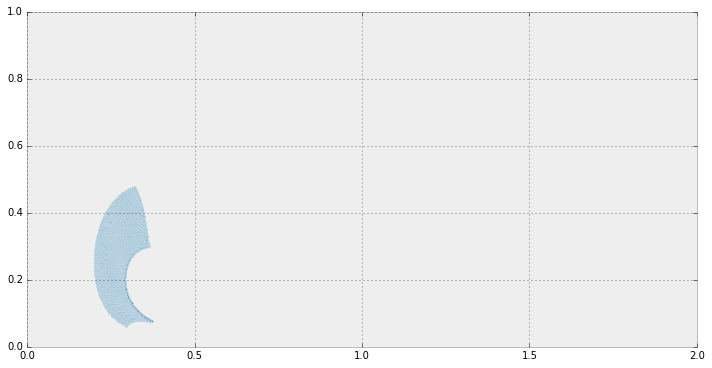

In [33]:
# Array to hold all grid points after transport
X1 = np.zeros((2, Ny, Nx))

# Transport parameters
tmax = 4.0
dt   = 0.5

# Loop over grid and update all positions
# This is where parallelisation would happen, since
# each position is independent of all the others
for i in range(Nx):
    for j in range(Ny):
        # Keep only the last position, not the entire trajectory
        X1[:,j,i] = trajectory(X0[:,j,i], tmax, dt, rk4, f)[:,-1]

        
# Make scatter plot to show all grid points
fig = plt.figure(figsize = (12,6))
plt.scatter(X1[0,:], X1[1,:], marker = '.', c = '#348ABD')
plt.xlim(0,2)
plt.ylim(0,1)

(0, 1)

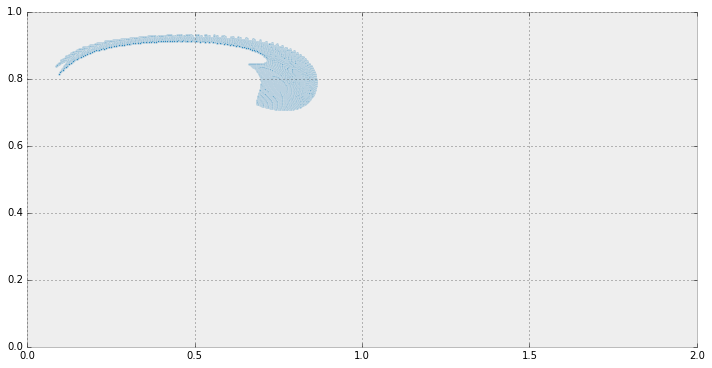

In [34]:
# Array to hold all grid points after transport
X1 = np.zeros((2, Ny, Nx))

# Transport parameters
tmax = 8.0
dt   = 0.5

# Loop over grid and update all positions
# This is where parallelisation would happen, since
# each position is independent of all the others
for i in range(Nx):
    for j in range(Ny):
        # Keep only the last position, not the entire trajectory
        X1[:,j,i] = trajectory(X0[:,j,i], tmax, dt, rk4, f)[:,-1]

        
# Make scatter plot to show all grid points
fig = plt.figure(figsize = (12,6))
plt.scatter(X1[0,:], X1[1,:], marker = '.', c = '#348ABD')
plt.xlim(0,2)
plt.ylim(0,1)

(0, 1)

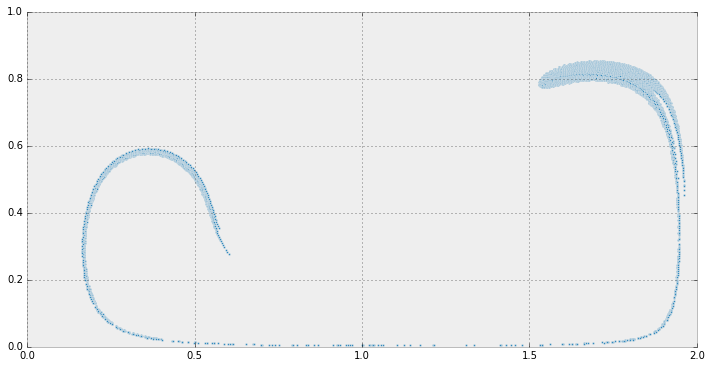

In [35]:
# Array to hold all grid points after transport
X1 = np.zeros((2, Ny, Nx))

# Transport parameters
tmax = 16.0
dt   = 0.5

# Loop over grid and update all positions
# This is where parallelisation would happen, since
# each position is independent of all the others
for i in range(Nx):
    for j in range(Ny):
        # Keep only the last position, not the entire trajectory
        X1[:,j,i] = trajectory(X0[:,j,i], tmax, dt, rk4, f)[:,-1]

        
# Make scatter plot to show all grid points
fig = plt.figure(figsize = (12,6))
plt.scatter(X1[0,:], X1[1,:], marker = '.', c = '#348ABD')
plt.xlim(0,2)
plt.ylim(0,1)

(0, 1)

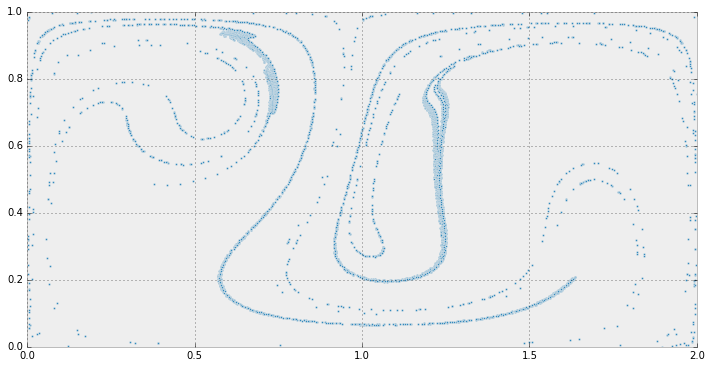

In [36]:
# Array to hold all grid points after transport
X1 = np.zeros((2, Ny, Nx))

# Transport parameters
tmax = 32.0
dt   = 0.5

# Loop over grid and update all positions
# This is where parallelisation would happen, since
# each position is independent of all the others
for i in range(Nx):
    for j in range(Ny):
        # Keep only the last position, not the entire trajectory
        X1[:,j,i] = trajectory(X0[:,j,i], tmax, dt, rk4, f)[:,-1]

        
# Make scatter plot to show all grid points
fig = plt.figure(figsize = (12,6))
plt.scatter(X1[0,:], X1[1,:], marker = '.', c = '#348ABD')
plt.xlim(0,2)
plt.ylim(0,1)

In [ ]:
# TODO:
# calculate the deformation for each of these points, and make a 2D plot showing log(γ − 1) as a funct
#γ =
#    a/b if a ≥ b
#    b/a if a < b

In [9]:
X1[0,:]

array([[ 0.        ,  0.0056296 ,  0.01123147, ...,  1.9971709 ,
         1.99859004,  2.        ],
       [ 0.        ,  0.0056984 ,  0.01136952, ...,  1.99659182,
         1.99829699,  2.        ],
       [ 0.        ,  0.00590452,  0.01178317, ...,  1.99483584,
         1.9974081 ,  2.        ],
       ..., 
       [ 0.        ,  0.07317406,  0.14822742, ...,  1.60274042,
         1.75029111,  2.        ],
       [ 0.        ,  0.07338537,  0.14865983, ...,  1.60201995,
         1.74968013,  2.        ],
       [ 0.        ,  0.07345591,  0.14880417, ...,  1.60177991,
         1.74947641,  2.        ]])

In [10]:
X1

array([[[ 0.        ,  0.0056296 ,  0.01123147, ...,  1.9971709 ,
          1.99859004,  2.        ],
        [ 0.        ,  0.0056984 ,  0.01136952, ...,  1.99659182,
          1.99829699,  2.        ],
        [ 0.        ,  0.00590452,  0.01178317, ...,  1.99483584,
          1.9974081 ,  2.        ],
        ..., 
        [ 0.        ,  0.07317406,  0.14822742, ...,  1.60274042,
          1.75029111,  2.        ],
        [ 0.        ,  0.07338537,  0.14865983, ...,  1.60201995,
          1.74968013,  2.        ],
        [ 0.        ,  0.07345591,  0.14880417, ...,  1.60177991,
          1.74947641,  2.        ]],

       [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.07273557,  0.07313986,  0.07345517, ...,  0.27282196,
          0.27478357,  0.27605148],
        [ 0.14376355,  0.14455407,  0.14517194, ...,  0.47148253,
          0.47419343,  0.47595034],
        ..., 
        [ 0.98857857,  0.98891916,  0.9891395 , ...,

In [12]:
np.zeros((2, 10, 5))

array([[[ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.]]])

In [17]:
np.meshgrid(np.linspace(0, 0.9, 10), np.linspace(0, 0.8, 5))

[array([[ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9],
        [ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9],
        [ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9],
        [ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9],
        [ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9]]),
 array([[ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2],
        [ 0.4,  0.4,  0.4,  0.4,  0.4,  0.4,  0.4,  0.4,  0.4,  0.4],
        [ 0.6,  0.6,  0.6,  0.6,  0.6,  0.6,  0.6,  0.6,  0.6,  0.6],
        [ 0.8,  0.8,  0.8,  0.8,  0.8,  0.8,  0.8,  0.8,  0.8,  0.8]])]